In [1]:
import os
import torch
from deeplsd.models.deeplsd_inference import DeepLSD
from line_understanding.pipeline import process_image_pipeline, plot_pipeline_results
from line_understanding.json_saver import save_lines_to_json 


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conf = {'detect_lines': True, 'line_detection_params': {'merge': False, 'filtering': True, 'grad_thresh': 3}}
ckpt = torch.load('../weights/deeplsd_md.tar', map_location='cpu', weights_only=False)
net = DeepLSD(conf)
net.load_state_dict(ckpt['model'])
net = net.to(device).eval()



In [3]:
frame_str = "0001"
desired_images = [
    "ai_001_001",
    "ai_001_004",
]



data/ai_001_001/ai_001_001/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.position.hdf5
[Neighborhood Method] ai_001_001: Detected 414 lines; 60 structural.


/home/Soufiane/.conda/envs/3dv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/Soufiane/.conda/envs/3dv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


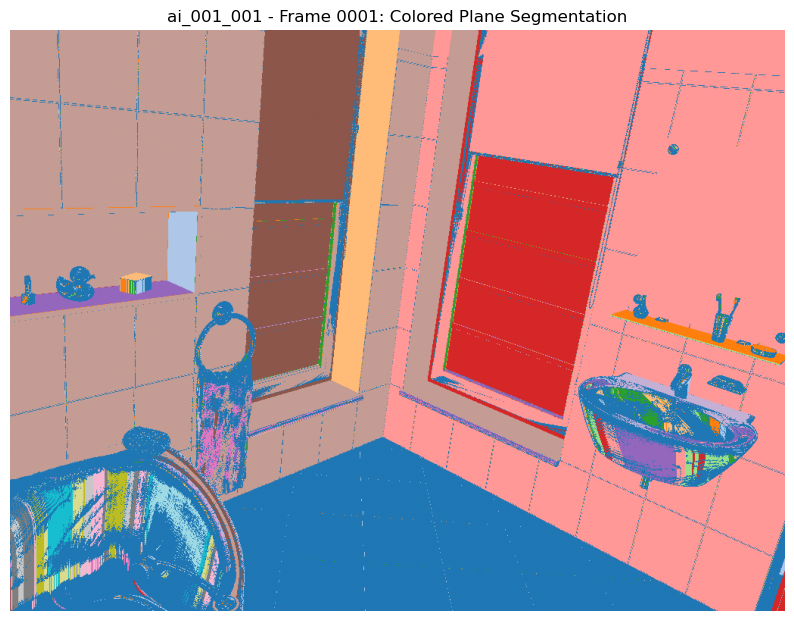

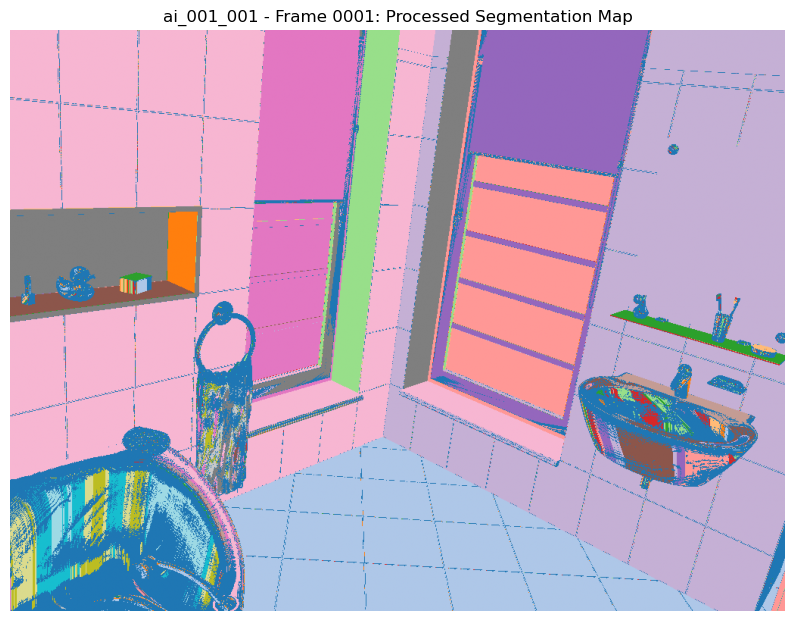

Unique Labels: [np.int32(-1), np.int32(262), np.int32(711), np.int32(988), np.int32(989), np.int32(2268), np.int32(3760), np.int32(4351), np.int32(4810), np.int32(4840), np.int32(6549), np.int32(6583), np.int32(6714), np.int32(6926), np.int32(6927), np.int32(6928), np.int32(6929), np.int32(7442), np.int32(7445), np.int32(8094), np.int32(8095), np.int32(8100), np.int32(8326), np.int32(8616), np.int32(10292), np.int32(10376), np.int32(10390), np.int32(10391), np.int32(10392), np.int32(10393), np.int32(11410), np.int32(11650), np.int32(11715), np.int32(11741), np.int32(11858), np.int32(11859), np.int32(11966), np.int32(12060), np.int32(12061), np.int32(12478)]
Number of Clusters: 40


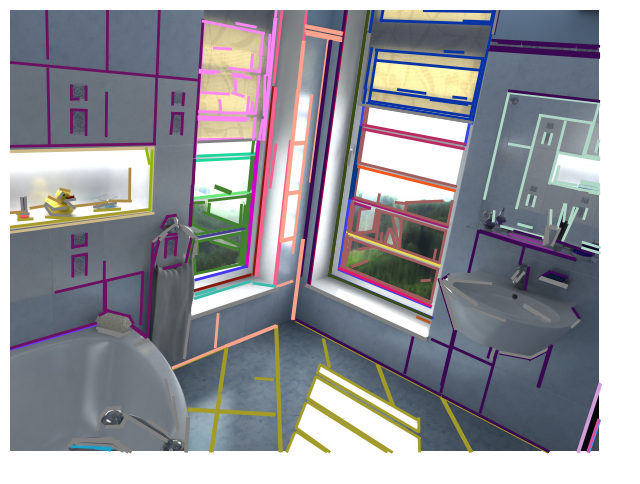

Saved JSON data to json_output/ai_001_001.json
data/ai_001_004/ai_001_004/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.position.hdf5
[Neighborhood Method] ai_001_004: Detected 337 lines; 86 structural.


/home/Soufiane/.conda/envs/3dv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/Soufiane/.conda/envs/3dv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


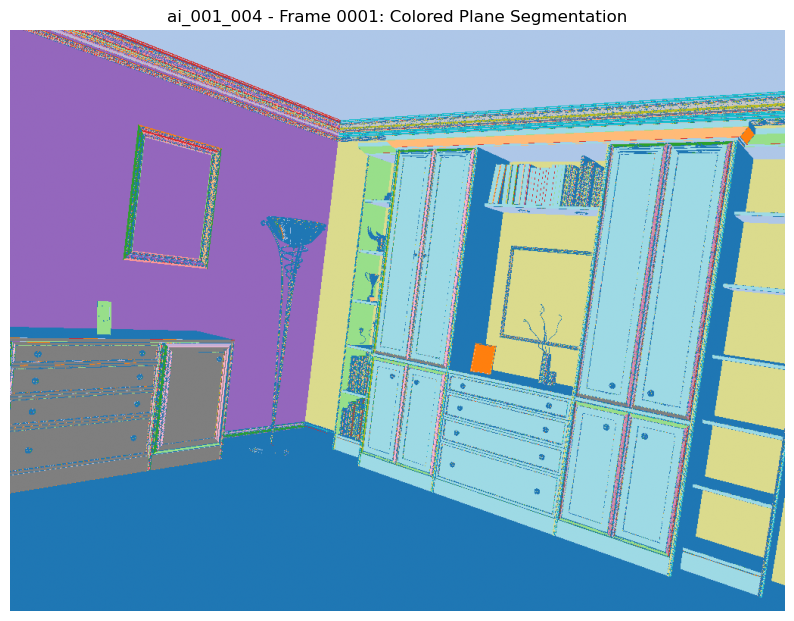

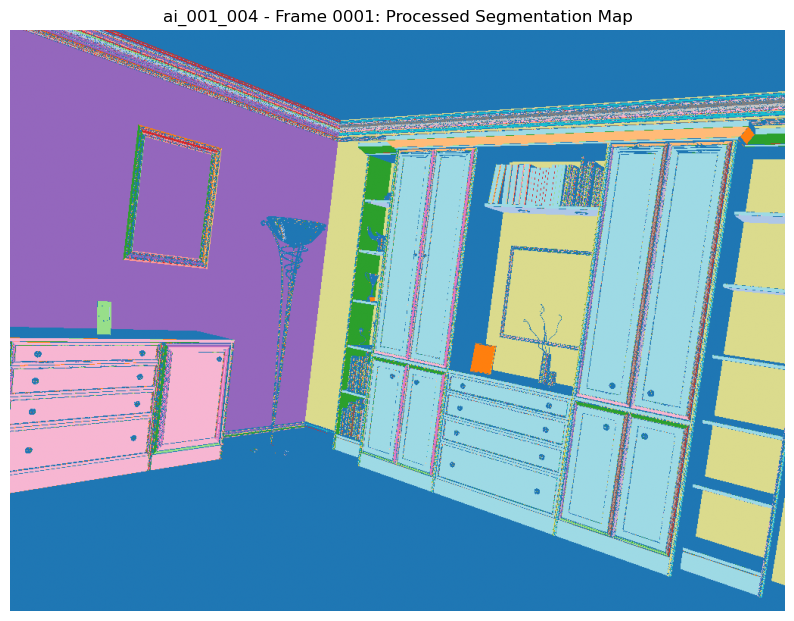

Unique Labels: [np.int32(-1), np.int32(32), np.int32(132), np.int32(217), np.int32(332), np.int32(336), np.int32(337), np.int32(338), np.int32(376), np.int32(721), np.int32(771), np.int32(1005), np.int32(1167), np.int32(1209), np.int32(1611), np.int32(2010), np.int32(2615), np.int32(2746), np.int32(2747), np.int32(4687), np.int32(6751), np.int32(9175), np.int32(9904), np.int32(10297), np.int32(10308), np.int32(11283), np.int32(13864), np.int32(17050), np.int32(17182), np.int32(17388), np.int32(18034), np.int32(18613), np.int32(18862), np.int32(27919), np.int32(35945), np.int32(35946), np.int32(35947), np.int32(35951), np.int32(35952), np.int32(35953), np.int32(35954), np.int32(36210), np.int32(37754), np.int32(37883), np.int32(37915), np.int32(40737), np.int32(40914), np.int32(40915), np.int32(40916), np.int32(40917), np.int32(40918), np.int32(40919), np.int32(40920), np.int32(40921), np.int32(40922), np.int32(40923), np.int32(40925), np.int32(40926), np.int32(40927), np.int32(40929), 

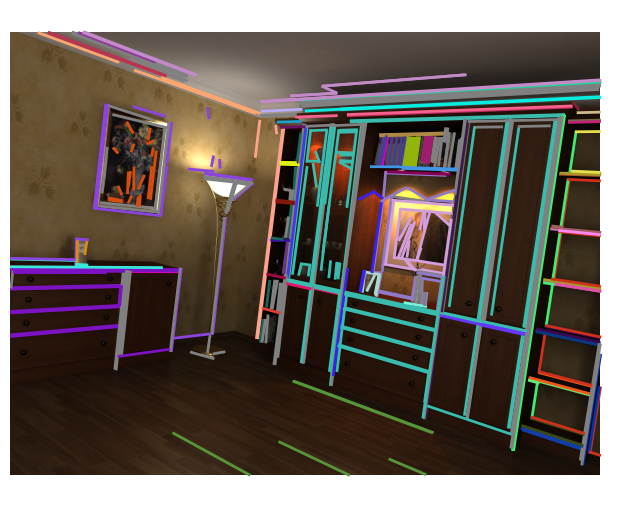

Saved JSON data to json_output/ai_001_004.json


In [4]:
# Process, plot, and save JSON data for each image.
for image_id in desired_images:
    processed_data = process_image_pipeline(image_id, frame_str, net, device)
    if processed_data is not None:
        plot_pipeline_results(processed_data, frame_str)
        save_lines_to_json(image_id, processed_data["line_info"])